In [2]:
# importing modules

import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

<AxesSubplot:>

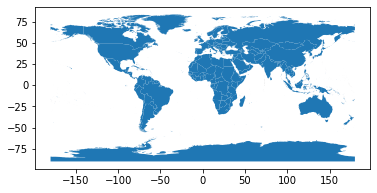

In [9]:
# Reading the Geographical data

world_data=gpd.read_file('world.shp')
world_data = world_data[['NAME','geometry']]


In [11]:
world_data.head()
# have now removed unwanted columns

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [13]:
# Calculating areas of each county

world_data['area']= world_data.area

world_data.head(15)

# Now we have created new columns which is area for each country

/var/folders/h1/mxh5jtpj2knc4fvr0rwh7ztr0000gn/T/ipykernel_8804/4114563784.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_data['area']= world_data.area


,NAME,geometry,area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093
5,Angola,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -...",103.823472
6,American Samoa,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546...",0.019243
7,Argentina,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056...",278.316269
8,Australia,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967...",695.813591
9,Bahrain,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25...",0.058684


<AxesSubplot:>

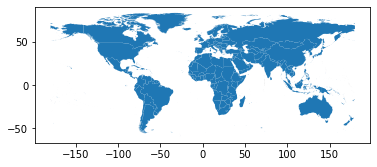

In [15]:
# Removing antartica from the datafame 

world_data= world_data[world_data['NAME']!='Antarctica']
world_data.plot()

# Now the Antarctica is removed from the map

<AxesSubplot:>

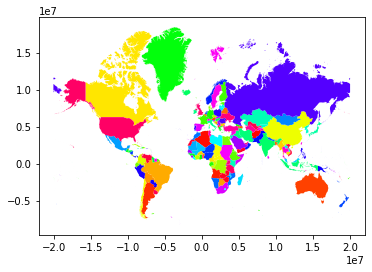

In [19]:
# changing the projections

current_crs=world_data.crs
world_data.to_crs(epsg=3857,inplace=True)
world_data.plot(column='NAME',cmap='hsv')

 

<AxesSubplot:>

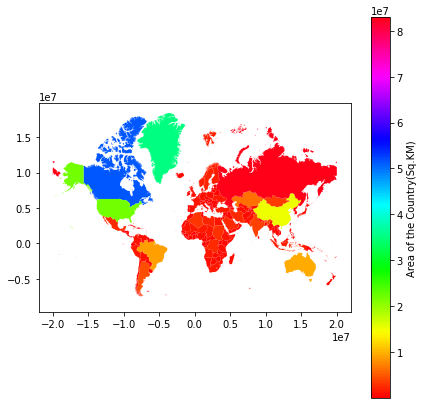

In [22]:
# Recalculating Area in Sq.Km

world_data['area']=world_data.area/1000000

# Adding the Legend
world_data.plot(column='area',cmap='hsv',legend=True,
               legend_kwds={'label':'Area of the Country(Sq.KM)'},figsize=(7,7))